<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/excercise6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install umap-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap

In [ ]:
from ydata_profiling import ProfileReport

df=pd.read_csv("/content/bankloan.csv")
profile=ProfileReport(df,title="Pandas Profile Report")


In [ ]:
profile

In [ ]:
df.describe()

,Row ID,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
count,368.000000,2.129990e+05,2.129990e+05,212999.000000,212999.000000,212999.000000,212999.000000,2.129990e+05,212999.000000,212999.000000,...,62365.000000,441.000000,439.000000,212999.000000,212999.000000,2.129990e+05,2.129990e+05,0.0,511.000000,511.000000
mean,184.500000,6.103515e+07,6.515927e+07,15257.965530,15257.965530,12.401658,440.842921,7.780071e+04,19.360817,0.347462,...,45.468356,107574.096327,18.320114,0.005718,261.951652,1.416537e+05,3.444425e+04,NaN,0.622309,0.377691
std,106.376689,4.734904e+06,5.215173e+06,8611.713377,8611.713377,4.249365,245.858646,8.188065e+04,31.925871,0.921209,...,22.645675,47921.057382,7.230012,0.081045,2215.188372,1.568766e+05,3.531827e+04,NaN,0.485285,0.485285
min,1.000000,5.670500e+04,7.082500e+04,1000.000000,1000.000000,5.320000,30.120000,0.000000e+00,0.000000,0.000000,...,0.000000,17950.000000,3.050000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000
25%,92.750000,5.783411e+07,6.158651e+07,8500.000000,8500.000000,9.170000,262.230000,4.700000e+04,12.660000,0.000000,...,28.000000,75001.000000,13.185000,0.000000,0.000000,3.143300e+04,1.460000e+04,NaN,0.000000,0.000000
50%,184.500000,6.137900e+07,6.549753e+07,14000.000000,14000.000000,12.290000,382.870000,6.500000e+04,18.720000,0.000000,...,45.000000,100000.000000,17.750000,0.000000,0.000000,8.138600e+04,2.510000e+04,NaN,1.000000,0.000000
75%,276.250000,6.503778e+07,6.956436e+07,20000.000000,20000.000000,14.650000,578.790000,9.250000e+04,25.520000,0.000000,...,63.000000,131000.000000,22.650000,0.000000,0.000000,2.097080e+05,4.260000e+04,NaN,1.000000,1.000000
max,368.000000,6.861687e+07,7.351969e+07,35000.000000,35000.000000,28.990000,1445.460000,9.000000e+06,9999.000000,30.000000,...,171.000000,410000.000000,43.860000,5.000000,380757.000000,4.127799e+06,1.641300e+06,NaN,1.000000,1.000000


## Ερώτημα 2

## 2.1

1. Το μεσο ποσό είναι :15257.965530, το ελάχιστο:1000.000000 και το μεγιστο:35000.000000 για το loan_amnt.

## 2.2 και 2.3 -( Data preprocessing )

Από το ProfileReport βρέθηκαν αρκετές μεταβλητές με συσχέτιση, οπότε πραγματοποιήθηκε έλεγχος συσχέτισης των μεταβλητών. Ο πίνακας συσχέτισης Pearson χρησιμοποιήθηκε με κατώφλι 0,85, και μεταβλητές με υψηλή συσχέτιση  αφαιρέθηκαν από το σύνολο χαρακτηριστικών.

In [ ]:
num_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr().abs()
upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
threshold = 0.85

high_corr_features = [
    column for column in upper_tri.columns
    if any(upper_tri[column] > threshold)
]

print(high_corr_features)


['id', 'member_id', 'funded_amnt', 'installment', 'out_prncp', 'total_rec_prncp', '60months']


In [ ]:
df= df.drop(columns=high_corr_features)

Επίσης αφαιρέθηκαν μεταβλητές με πολύ υψηλό ποσοστό ελλιπών τιμών, καθώς δεν είναι εφικτή η αξιόπιστη συμπλήρωσή τους εφόσον οι διαθέσιμες παρατηρήσεις είναι ελάχιστες.

In [ ]:
df = df.drop(['Row ID','mths_since_last_delinq', 'mths_since_last_major_derog', 'dti_joint', '36months','annual_inc_joint','Unnamed: 50','term'], axis=1)


Οι emp_title και title περιγράφουν πληροφορίες για επάγγελμα και λόγους δανείου, οπότε επίσης αφαιρούνται.

In [ ]:
df = df.drop(['emp_title','title'], axis=1)


Επίσης, οι ημερομηνίες αφαιρούνται κι αυτές γιατί περιέχουν πληροφορία που δεν είναι διαθέσιμη τη στιγμή της αξιολόγησης του δανείου (όπως το πότε θα πληρωθεί η τελευταία δόση του δανείου ή μήνες από όταν δεν πληρώθηκε η τελευτάια δόση δανείου), άρα προκαλούν data leakage.

In [ ]:
df = df.drop(['last_pymnt_d','next_pymnt_d','last_credit_pull_d'], axis=1)


Επίσης, οι παρακάτω στήλες αφαιρούνται γιατί περιέχουν πληροφορία η οποία είναι γνωστή αφότου έχει δωθεί το δάνειο. Δηλαδή δεν είναι στις αρχικές πληροφορίες που θα έχει η τράπεζα.

In [ ]:
leakage_cols = ['loan_status','total_pymnt','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','issue_d',
    'earliest_cr_line']

df = df.drop(columns=leakage_cols)


Έλεγχος για την ύπαρξη κενών τιμών.

In [ ]:
print(df.isnull().sum())

loan_amnt                        0
int_rate                         0
grade                            0
sub_grade                        0
emp_length                    4501
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      30
total_acc                        0
initial_list_status              0
collections_12_mths_ex_med       1
application_type                 1
acc_now_delinq                   1
tot_coll_amt                     1
tot_cur_bal                      1
total_rev_hi_lim                 1
dtype: int64


Οι κενές τιμές αντικαθίστονται παρακάτω από τη μέση τιμή της αντίστοιχης μεταβλητής.

Η emp_length έχει strings οπότε μετατρέπονται οι τιμές σε ακεραίους οριν την επεξεργασία για τον υπολογισμό μέσης τιμής.

In [ ]:
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 10,
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
})

df['emp_length'] = df['emp_length'].astype(float)

/tmp/ipython-input-295171036.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace({


Οι κενές τιμές γεμίζονται βάση της μέσης τιμής της στήλης που ανήκουν.

In [ ]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mean())
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].mean())
df['acc_now_delinq'] = df['acc_now_delinq'].fillna(df['acc_now_delinq'].mean())
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(df['tot_coll_amt'].mean())
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(df['tot_cur_bal'].mean())
df['total_rev_hi_lim'] = df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].mean())


Έλεγχος αν υπάρχουν κενές τιμές ακόμα.

In [ ]:
print(df.isnull().sum())

loan_amnt                     0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
collections_12_mths_ex_med    0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_rev_hi_lim              0
dtype: int64


Έλεγχος τι τύποι υπάρχουν στις μεταβλητές. Έλεγχος συγκεκριμένα για μεταβλητές τύπου κειμένου ('object', 'string', 'category').

In [ ]:
print(df.dtypes)
df.select_dtypes(include=['object', 'string', 'category']).columns

loan_amnt                       int64
int_rate                      float64
grade                          object
sub_grade                      object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
purpose                        object
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
initial_list_status            object
collections_12_mths_ex_med    float64
acc_now_delinq                float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_rev_hi_lim              float64
dtype: object


Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status'],
      dtype='object')

Χρήση get_dummies για one-hot-encoding.
Δεν γίνεται γαι την sub_grades στηλη, γιατί αυτή θα χρειαστεί μετέπειτα σε επόμενοερώτημα και  ούτως ή άλλως τελικά θα αφαιρεθει και από το τελικό x που θα δημιουργηθεί.

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'string', 'category']).columns
cat_cols = cat_cols.drop('sub_grade')
print(cat_cols)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status'],
      dtype='object')


Έλεγχος των τύπων που υπάρχουν.

In [ ]:
print(df_encoded.dtypes)
df_encoded.select_dtypes(include=['object', 'string', 'category']).columns

loan_amnt                                int64
int_rate                               float64
sub_grade                               object
emp_length                             float64
annual_inc                             float64
dti                                    float64
delinq_2yrs                              int64
inq_last_6mths                           int64
open_acc                                 int64
pub_rec                                  int64
revol_bal                                int64
revol_util                             float64
total_acc                                int64
collections_12_mths_ex_med             float64
acc_now_delinq                         float64
tot_coll_amt                           float64
tot_cur_bal                            float64
total_rev_hi_lim                       float64
grade_B                                   bool
grade_C                                   bool
grade_D                                   bool
grade_E      

Index(['sub_grade'], dtype='object')

## 2.4 - Create target column

Ο κώδικας παρακάτω δημιουργεί μια λίστα με τις εγκεκριμένους βαθμούς  (approved_grades) και στη συνέχεια ελέγχει για κάθε τιμή της μεταβλητής sub_grade αν ανήκει στη λίστα.
Το αποτέλεσμα (True/False) μετατρέπεται σε δυαδική μορφή (1/0) και αποθηκεύεται ως νέα μεταβλητή target, όπου 1 σημαίνει «εγκεκριμένος» και 0 «μη εγκεκριμένος».

In [ ]:
approved_grades = ['A1', 'A2', 'A3', 'A4', 'A5','B1', 'B2']

df_encoded['target'] = df_encoded['sub_grade'].isin(approved_grades).astype(int)


Έλεγχος δημιουργιας taget column βάση sub_grade.

In [ ]:
print(df_encoded['target'].value_counts())
df_encoded[['sub_grade', 'target']].value_counts()


target
0    53968
1    21094
Name: count, dtype: int64


,,count
sub_grade,target,
B3,0,4885
C1,0,4822
B4,0,4788
C4,0,4644
B5,0,4625
C2,0,4545
C3,0,4480
B2,1,4249
B1,1,4083


In [ ]:
df_encoded = df_encoded.drop('sub_grade', axis=1)

Δημιουργία x,y.

In [ ]:
y = df_encoded['target']
x = df_encoded.drop(columns=['target'])
print(x.shape)
print(y.shape)
x.dtypes.value_counts()

(75062, 40)
(75062,)


,count
bool,23
float64,10
int64,7


##

## 2.5

Το σύνολο δεδομένων χωρίστηκε σε τμήματα ποσού δανείου από τη μικρότερη έως τη μεγαλύτερη τιμή, με βήμα 5.000.
<br>
Η συνάρτηση cut χρησιμοποιήθηκε για να αντιστοιχιστεί κάθε αίτηση στο αντίστοιχο εύρος ποσού.
<br>
Στη συνέχεια, με χρήση της groupby, για κάθε εύρος ποσού, εξετάζονται οι αιτήσεις που ανήκουν σε αυτό και υπολογίζουμε τον μέσο όρο της target  μεταβλητής (0/1), ο οποίος εκφράζει το ποσοστό έγκρισης των αιτήσεων στο συγκεκριμένο εύρος.

In [ ]:
bins = np.arange(df_encoded['loan_amnt'].min(),df_encoded['loan_amnt'].max(),5000)

df_encoded['loan_range'] = pd.cut(df_encoded['loan_amnt'], bins=bins)

approval_rates = (df_encoded.groupby('loan_range')['target'].mean().reset_index(name='approval_rate'))
valid_ranges = approval_rates[approval_rates['approval_rate'] >= 0.15]
valid_ranges



/tmp/ipython-input-2264971292.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rates = (df_encoded.groupby('loan_range')['target'].mean().reset_index(name='approval_rate'))


,loan_range,approval_rate
0,"(1000, 6000]",0.275971
1,"(6000, 11000]",0.333095
2,"(11000, 16000]",0.287797
3,"(16000, 21000]",0.269116
4,"(21000, 26000]",0.281895
5,"(26000, 31000]",0.265403


## Ερώτημα 3 (Classification):

Η στήλη grade περιέχει πληροφορία σχετική με τον 'βαθμό' του πελάτη,, βάση οποίου δημιουργήθηκαν τα targets/labels, άρα πρεπει να αφαιρεθεί από τα x.

In [ ]:
x = x.drop(['grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G','int_rate'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42,stratify=y)


Παρακάτω γίνεται κανονικοποίηση των δεδομένων.
<br>
Επιλέχθηκε η κανονικοποίηση με StandardScaler, γιατί όπως φαίνεται και από την profile, τα δεδομένα εμφανίζουν έντονη ασυμμετρία και ακραίες τιμές.
<br>
 Ο μετασχηματισμός αυτός κεντράρει τις μεταβλητές και μειώνει την επίδραση μεγάλων τιμών.

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)


## Ερώτημα 3.3 και 3.4 Classifier-Metrics

ο ταξινομητής που επιλέχθηκε είανι Logistic Regression λόγω του ότι είναι  αποδοτική σε μεγάλα σύνολα δεδομένων και βγάζει προβλέψεις με μορφή πιθανοτήτων.

In [ ]:
clf = LogisticRegression(
    max_iter=500,
    class_weight='balanced'
)

clf.fit(x_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=500,class_weight='balanced'),param_grid,cv=3,scoring='roc_auc',n_jobs=-1)
grid.fit(x_train_scaled, y_train)
best_model = grid.best_estimator_


Στο πρόβλημα της πρόβλεψης δανειοδότησης, οι σημαντικότερες μετρικές είναι το Recall και το F1-score.
<br>
Το Recall αποτυπώνει την ικανότητα του μοντέλου να αναγνωρίζει τους πραγματικά αξιόπιστους υποψηφίους, ελαχιστοποιώντας την απόρριψη καλών πελατών. Η υψηλή τιμή του Recall είναι χρήσιμη γιατί είναι σημαντικό για την τράπεζα να μην χάσει περιπτώσεις ατόμων που θα έπαιρναν και πλήρωναν τα δάνεια.
<br>
Επίσης, το F1-score παρέχει μια ισορροπημένη αξιολόγηση μεταξύ Precision και Recall, χρήσιμη σε  δεδομένων με ανισορροπία κλάσεων, όπως το συγκεκριμένο.

In [ ]:
y_pred = best_model.predict(x_test_scaled)
y_proba = best_model.predict_proba(x_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.75      0.81     16191
           1       0.53      0.74      0.62      6328

    accuracy                           0.74     22519
   macro avg       0.71      0.74      0.71     22519
weighted avg       0.78      0.74      0.75     22519



## Ερώτημα 4 (Feature Importance & Selection)

Παρακάτω εκπαιδεύτεαι το Random Forest και βρίσκονται τα 15 σημαντικότερα χαρακτηριστικά τα οποί αταξινομουνται με feature_importances.sort_values.

In [ ]:
rf_clf = RandomForestClassifier( n_estimators=300,  random_state=42,n_jobs=-1,class_weight='balanced'  )
rf_clf.fit(x_train_scaled, y_train)
y_pred_rf = rf_clf.predict(x_test_scaled)
print(classification_report(y_test, y_pred_rf))

feature_importances = pd.Series(rf_clf.feature_importances_,index=x_train.columns )
top15_features = feature_importances.sort_values(ascending=False).head(15)
print("15 σημαντικότερα χαρακτηριστικά:")
print(top15_features)


              precision    recall  f1-score   support

           0       0.81      0.94      0.87     16191
           1       0.75      0.42      0.54      6328

    accuracy                           0.80     22519
   macro avg       0.78      0.68      0.71     22519
weighted avg       0.79      0.80      0.78     22519

15 σημαντικότερα χαρακτηριστικά:
total_rev_hi_lim                0.110141
revol_util                      0.104236
dti                             0.093864
loan_amnt                       0.087832
annual_inc                      0.079428
revol_bal                       0.075619
tot_cur_bal                     0.070751
total_acc                       0.060006
open_acc                        0.051799
inq_last_6mths                  0.043329
emp_length                      0.036612
verification_status_Verified    0.035991
purpose_credit_card             0.024329
tot_coll_amt                    0.019953
delinq_2yrs                     0.015994
dtype: float64


## 4.2

Παρακάτω υπολογίζεται και τυπώντεαι ο correlation matrix. Τα 15 σημαντικότερα χαρ/κα αποθηκεύονται ξεχωριστά σε dataframe και για αυτα υπολογόζεται ο correlation matrix.

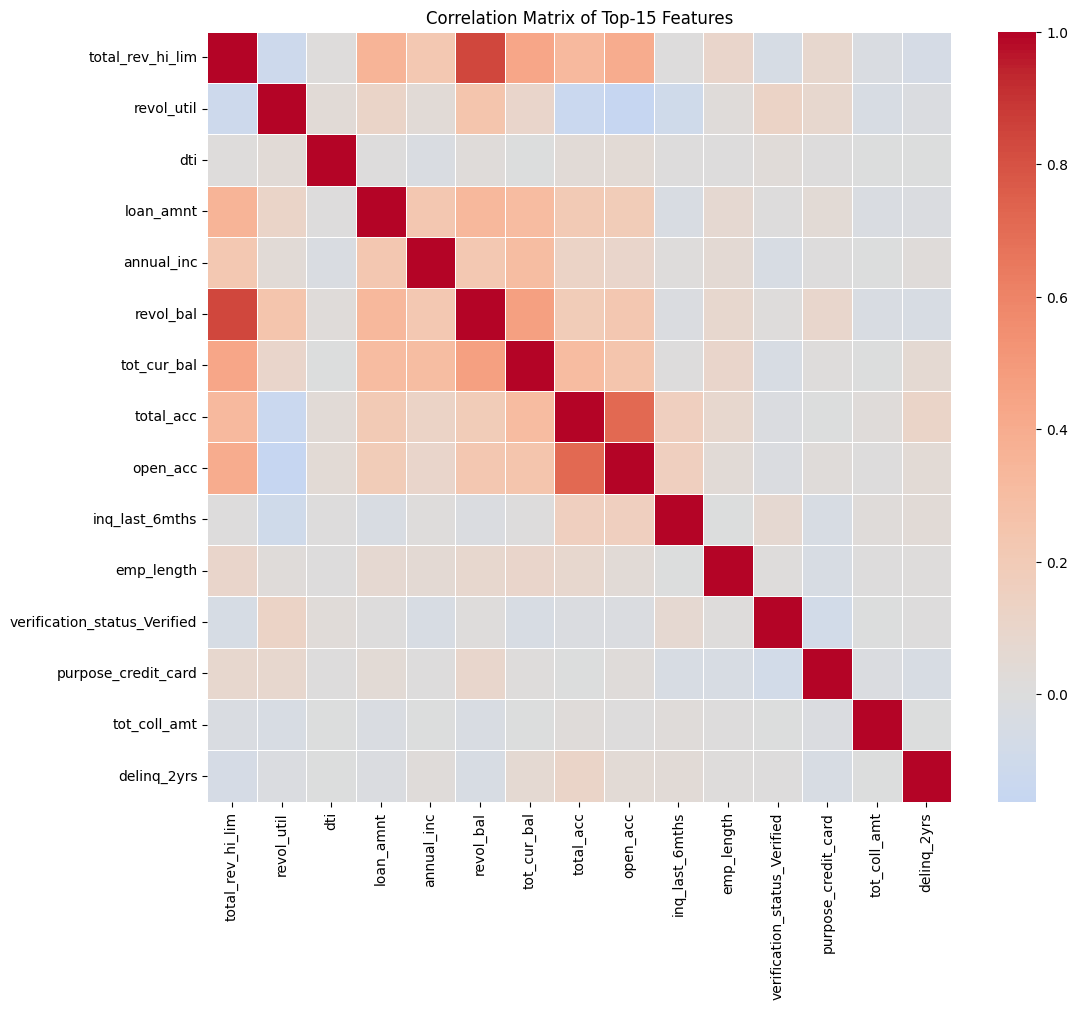

In [ ]:
top15_cols = top15_features.index
x_top15 = x[top15_cols]
corr_matrix = x_top15.corr(method='pearson')

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,cmap='coolwarm',center=0,linewidths=0.5)
plt.title("Correlation Matrix of Top-15 Features")
plt.show()



Κρατήθηκαν όσες μεταβλητές είχαν πιο πολύ χρώματα που αντιστοιχούσαν σε χαμηλές τιμές της κίμακας (χαμηλή συσχέτιση) στο correlation matrix. Για αυτές δημιουργη΄θηκε νέο x_train,x_test,y_train,y_test και εκπαιδεύτηκε ο ταξινομητής.

In [ ]:
selected_features = [
    'total_rev_hi_lim',
    'revol_util',
    'loan_amnt',
    'total_acc',
    'open_acc',
    'inq_last_6mths',
    'emp_length',
    'verification_status_Verified',
    'purpose_credit_card',
    'tot_coll_amt',
    'delinq_2yrs'
]

x_n = x[selected_features]
x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(x_n, y, test_size=0.3, random_state=42, stratify=y)

#Εκπαίδευση ταξινομητή Rndom Forest για αυτα τα χαρ/κα.
rf_n = RandomForestClassifier(n_estimators=300,random_state=42,n_jobs=-1,class_weight='balanced')
rf_n.fit(x_train_n, y_train_n)

y_pred_n = rf_n.predict(x_test_n)
print(classification_report(y_test_n, y_pred_n))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     16191
           1       0.67      0.41      0.51      6328

    accuracy                           0.78     22519
   macro avg       0.74      0.67      0.68     22519
weighted avg       0.77      0.78      0.76     22519



Η χρήση όλων των διαθέσιμων χαρακτηριστικών οδηγεί σε καλύτερη απόδοση, ιδιαίτερα ως προς το Recall, το οποίο είναι χρήσιμο metric.

Παρατηρείται ότι τοRandom Forest με χρήση 15 χαρακτηριστικών με λιγότερη συσχέτιση παρουσιάζει μικρή πτώση στα metrics, κάτι το τοποίο δείχνει πως τα υψηλότερα συχτεισμένων χαρακτηριστικών πιθανώς περιείχαν κάποια χρήσιμη πληροφορια.
Τα αποτελέσματα δείχνουν ότι η μείωση του correlation δεν συνεπάγεται απαραίτητα καλύτερη απόδοση, ειδικά σε μοντέλα τύπου Random Forest, τα οποία είναι ανθεκτικά σε συσχετισμένα χαρακτηριστικά.

## Ερώτημα 5 (Dimensionality Reduction):

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Εφαρμογή StandardScaler στα δεδομένα.<br>
Επειδή τα δεδομένα είναι εικόνες 3 διαστάσεων (N,28,28), γίνεται πρώτα flatten, γιατί η StandardScaler δέχεται 2 διαστάσεων είσοδο αλλά ούτως ή αλλως θα γινοταν flatten στην πορεια του preprocessing.


In [ ]:
x_train = x_train.reshape(len(x_train), -1).astype('float32')
x_test  = x_test.reshape(len(x_test), -1).astype('float32')

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

## 5.3 PCA και kNN

Αν εφαρμόζαμε το PCA ξεχωριστά στο x_train και στο x_test, ή αν ενώναμε τα δύο σύνολα και υπολογίζαμε το PCA πάνω στο συνολικό dataset, τότε θα προέκυπτε data leakage.
Αυτό θα γινόταν γιατί το PCA μαθαίνει από τα δεδομένα για να υπολογίσει τις κύριες συνιστώσες του χώρου χαρακτηριστικών.

Οπότε αν ο μετασχηματισμός αυτός υπολογιστεί χρησιμοποιώντας και το x_test , τότε το μοντέλο θα έχει πρόσβαση σε πληροφορία από τα δεδομένα που θεωρητικά πρέπει να παραμείνουν εντελώς άγνωστα μέχρι την τελική αξιολόγηση (x_test).


In [ ]:
pca = PCA(n_components=300, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca  = pca.transform(x_test_scaled)

print("x_train_pca:", x_train_pca.shape)
print("x_test_pca :", x_test_pca.shape)

x_train_pca: (60000, 300)
x_test_pca : (10000, 300)


In [ ]:
k_values = [5, 15, 51, 101]
results = []

for k in k_values:
    print(f"\nk = {k}:")
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(x_train_pca, y_train)

    y_pred = knn.predict(x_test_pca)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))
    print(f"Test accuracy for k={k}: {acc * 100:.2f}%")


k = 5:
Test accuracy for k=5: 94.97%

k = 15:
Test accuracy for k=15: 94.36%

k = 51:
Test accuracy for k=51: 92.73%

k = 101:
Test accuracy for k=101: 91.58%


## 5.4 LDA

In [ ]:
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_scaled, y_train)
x_test_lda  = lda.transform(x_test_scaled)

print("x_train_lda:", x_train_lda.shape)
print("x_test_lda :", x_test_lda.shape)


x_train_lda: (60000, 2)
x_test_lda : (10000, 2)


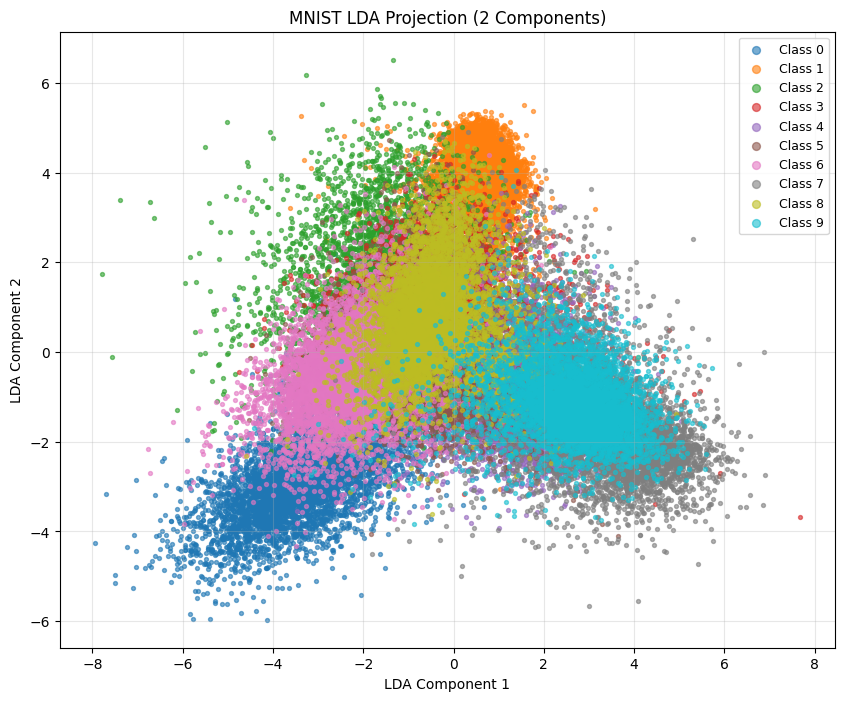

In [ ]:
plt.figure(figsize=(10, 8))

classes = np.unique(y_train)
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

for cls, color in zip(classes, colors):
    idx = (y_train == cls)
    plt.scatter(
        x_train_lda[idx, 0],
        x_train_lda[idx, 1],
        s=8,
        color=color,
        label=f"Class {cls}",
        alpha=0.6
    )

plt.title("MNIST LDA Projection (2 Components)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(markerscale=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.show()


Η προβολή των MNIST δεδομένων σε δύο διαστάσεις μέσω LDA δείχνει ότι η μέθοδος επιτυγχάνει έναν γενικό διαχωρισμό μεταξύ των κλάσεων, δημιουργώντας μεγάλες περιοχές διαφορετικών χρωμάτων. Ορισμένες κλάσεις (π.χ. 1, 0) σχηματίζουν πιο συγκεντρωμένες ομάδες, ενώ άλλες επικαλύπτονται(πχ η 3 φαίνεται να επικαλύπτεται από 2,8). Το αποτέλεσμα σημαίνει πιθανως ότι μειώνοντας σε μόνο δύο διαστάσεις από τις 784 που είχαμε αρχικά, περιορίζεται η ικανότητα διαχωρισμού.

## 5.5 u-map

In [ ]:
umap_model = umap.UMAP(n_components=2,n_neighbors=15,min_dist=0.1,metric="euclidean",random_state=42)

x_train_umap = umap_model.fit_transform(x_train_scaled)
x_test_umap  = umap_model.transform(x_test_scaled)

print("x_train_umap:", x_train_umap.shape)
print("x_test_umap :", x_test_umap.shape)


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


x_train_umap: (60000, 2)
x_test_umap : (10000, 2)


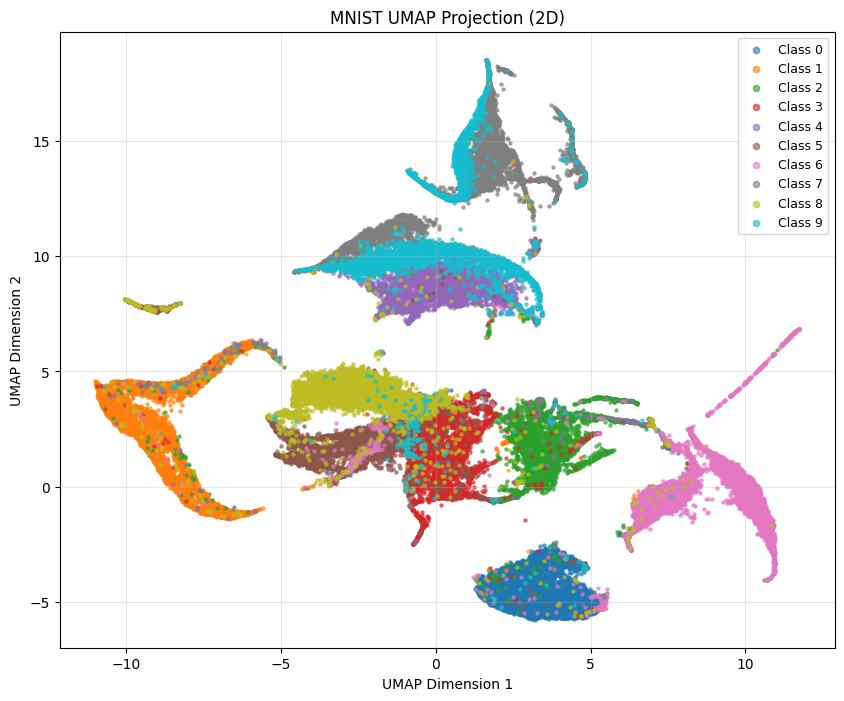

In [ ]:
plt.figure(figsize=(10, 8))

classes = np.unique(y_train)
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

for cls, color in zip(classes, colors):
    idx = (y_train == cls)
    plt.scatter(
        x_train_umap[idx, 0],
        x_train_umap[idx, 1],
        s=5,
        color=color,
        label=f"Class {cls}",
        alpha=0.6
    )

plt.title("MNIST UMAP Projection (2D)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(markerscale=2, fontsize=9)
plt.grid(True, alpha=0.3)
plt.show()


Η έξοδος της umap ειναι σημαντικά διαφορετική από της PCA, καθώς τα σχηματα είναι πιο ξεκάθαρεα και δεν περιορίζονται στη 'μέση' του χώρου αλλά είναι πιο διασκορπισμένα. Επίσης στην LDA τα σχήματα ήταν πιο πολύ σαν συστάδες κυκλιές ενώ εδώ οι ομάδες ειναι πιο περιπλοκα και διαφορετικά σχήματα ενώ φαίνονται πιο εύκολα διαχωρίσιμα απο ό,τι της LDA.

